# Imports

In [32]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import torch
from torchvision import transforms
from PIL import Image
import easyocr

In [2]:
!git clone https://github.com/ultralytics/yolov5
!cd yolov5 & pip install -r requirements.txt  

fatal: destination path 'yolov5' already exists and is not an empty directory.


# Load Models

In [33]:
model_rider = torch.hub.load('ultralytics/yolov5', 'custom', path = 'rider.pt', force_reload=True)
model_rider.cuda()

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\mayan/.cache\torch\hub\master.zip
YOLOv5  2024-2-28 Python-3.9.18 torch-2.1.2 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [34]:
model_helmet = torch.hub.load('ultralytics/yolov5', 'custom', path = 'plate_and_helmet.pt', force_reload=True)
model_helmet.cuda()

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\mayan/.cache\torch\hub\master.zip
YOLOv5  2024-2-28 Python-3.9.18 torch-2.1.2 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# Test on images

In [51]:
img = './thar7.jpg'

image 1/1: 1600x1201 1 bike-riders
Speed: 656.8ms pre-process, 21.9ms inference, 58.1ms NMS per image at shape (1, 3, 640, 480)


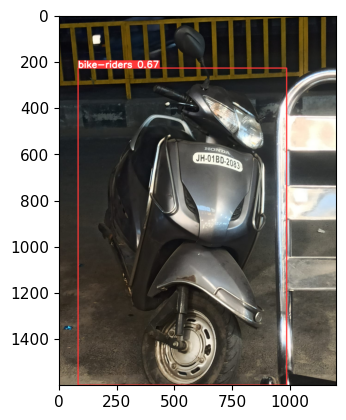

In [52]:
rider = model_rider(img)
rider.print()

%matplotlib inline
plt.imshow(np.squeeze(rider.render()))
plt.show()

In [53]:
img_rider = np.squeeze(rider.render())

image 1/1: 1600x1201 1 Plate
Speed: 7.2ms pre-process, 15.7ms inference, 63.7ms NMS per image at shape (1, 3, 640, 480)


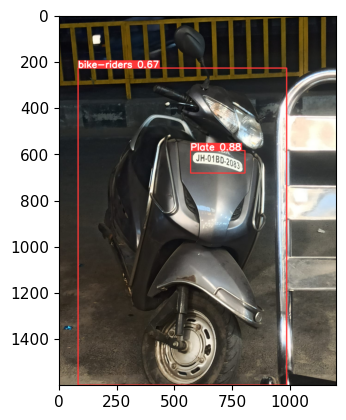

In [54]:
helmet = model_helmet(img_rider)
helmet.print()

%matplotlib inline
plt.imshow(np.squeeze(helmet.render()))
plt.show()

# Cropping image of rider for detecting helmet and plate

In [55]:
count = 1

In [56]:
original_image = Image.open(img)
transform = transforms.ToTensor()

# Iterate over the detected objects
for i, obj in enumerate(rider.xyxy[0]):
    # Get coordinates of the bounding box
    x1, y1, x2, y2, conf, cls = obj.tolist()
    
    # Convert bounding box coordinates to integers
    x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
    print(x1,y1,x2,y2)
    
    # Crop the detected object from the original image
    cropped_img = original_image.crop((x1, y1, x2, y2))
    
    # Save or display the cropped object
    cropped_img.show()  # Display the cropped object
    path = './Cropped_Rider'+str(count)+'.jpg'
    count+=count
    cropped_img.save(path)

82 229 983 1600


In [57]:
count2 = 1

In [58]:
original_image = Image.open(path)
transform = transforms.ToTensor()

helmet = model_helmet(original_image)
helmet.print()

# Iterate over the detected objects
for i, obj in enumerate(helmet.xyxy[0]):
    x1, y1, x2, y2, conf, cls = obj.tolist()
    x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
    cropped_img = original_image.crop((x1, y1, x2, y2))
    
    print(cls)

    # Convert numpy array to PIL image
    image_pil = Image.fromarray(np.squeeze(helmet.render()))

    # Show the image
    image_pil.show()
    image_pil.save('./Rider_Helmet_Plate' + str(count2) + '.jpg')

image 1/1: 1371x901 1 Plate
Speed: 8.2ms pre-process, 24.8ms inference, 71.0ms NMS per image at shape (1, 3, 640, 448)


0.0


# Cropping plate img and reading text

In [59]:
count2 = 1

In [60]:
original_image = Image.open(path)
transform = transforms.ToTensor()

# Iterate over the detected objects
for i, obj in enumerate(helmet.xyxy[0]):
    # Get coordinates of the bounding box
    x1, y1, x2, y2, conf, cls = obj.tolist()
    
    # Convert bounding box coordinates to integers
    x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
    
    # Check if the detected object belongs to the selected class
    if int(cls) == 0:
        # Crop the detected object from the original image
        cropped_img = original_image.crop((x1, y1, x2, y2))
        
        # Save or display the cropped object
        cropped_img.show()

        path2 = './Num_Plate'+str(count2)+'.jpg'
        cropped_img.save(path2)

In [65]:
cropped_img = Image.open(path2)  # Assuming you saved the cropped image as "cropped_image.jpg"
cropped_img = cropped_img.convert('L')
#cropped_img.show()
# Convert PIL image to NumPy array
cropped_img_np = np.array(cropped_img)

# Initialize EasyOCR reader
reader = easyocr.Reader(['en'])  # You can specify the languages you want to recognize



# Perform OCR on the resized image
text = reader.readtext(cropped_img_np)
#print(text)
for detection in text:
    if (len(detection[1])>=10) & (len(detection[1])<=12):
        print("License Num:", detection[1].upper())

License Num: JH-O1BD-2083


# Real time

In [3]:
import cv2
import numpy as np
import torch
from torchvision import transforms
import easyocr
import csv
from datetime import datetime

!git clone https://github.com/ultralytics/yolov5
!cd yolov5 && pip install -r requirements.txt

model_rider = torch.hub.load('ultralytics/yolov5', 'custom', path='rider.pt', force_reload=True)
model_rider.cuda()
model_helmet = torch.hub.load('ultralytics/yolov5', 'custom', path='plate_and_helmet.pt', force_reload=True)
model_helmet.cuda()

wCam, hCam = 1280, 750

cap = cv2.VideoCapture('./test2.mp4')
cap.set(3, wCam)
cap.set(4, hCam)

count = 1

plate,hel,hea = 3,3,3

csv_file_path = './data.csv'
plate_text = 'ERROR_READING'


while True:
    # Import image
    success, original_img = cap.read()
    #original_img = cv2.flip(original_img, 1)  # Flip the image horizontally

    transform = transforms.ToTensor()

    rider = model_rider(original_img)

    # Iterate over the detected objects
    for i, obj in enumerate(rider.xyxy[0]):
        # Get coordinates of the bounding box
        x1, y1, x2, y2, conf, cls = obj.tolist()

        # Convert bounding box coordinates to integers
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

        # Draw bounding box on original image
        cv2.rectangle(original_img, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Crop the detected object from the original image
        cropped_img = original_img[y1:y2, x1:x2]

        helmet = model_helmet(cropped_img)
        for j, objs in enumerate(helmet.xyxy[0]):
            # Get coordinates of the bounding box
            x1_helmet, y1_helmet, x2_helmet, y2_helmet, conf_helmet, cls_helmet = objs.tolist()

            # Convert bounding box coordinates to integers
            x1_helmet, y1_helmet, x2_helmet, y2_helmet = int(x1_helmet), int(y1_helmet), int(x2_helmet), int(y2_helmet)

            # Check if the detected object belongs to the selected class
            if int(cls_helmet) == 1:
                # Draw bounding box on cropped image
                cv2.rectangle(cropped_img, (x1_helmet, y1_helmet), (x2_helmet, y2_helmet), (255, 0, 0), 2)
                cv2.putText(cropped_img, 'Helmet', (x1_helmet, y1_helmet - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)

                hel = 1
            
            elif int(cls_helmet) == 2:
                # Draw bounding box on cropped image
                cv2.rectangle(cropped_img, (x1_helmet, y1_helmet), (x2_helmet, y2_helmet), (255, 0, 0), 2)
                cv2.putText(cropped_img, 'Head', (x1_helmet, y1_helmet - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
            
                hea = 2

            elif int(cls_helmet) == 0:
                # Draw bounding box on cropped image
                cv2.rectangle(cropped_img, (x1_helmet, y1_helmet), (x2_helmet, y2_helmet), (255, 0, 0), 2)
                cv2.putText(cropped_img, 'plate', (x1_helmet, y1_helmet - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)

                plate = 0

                cropped_img2 = cropped_img[y1_helmet:y2_helmet, x1_helmet:x2_helmet]

                cropped_img_np = np.array(cropped_img2)

                # Initialize EasyOCR reader
                reader = easyocr.Reader(['en'])  # You can specify the languages you want to recognize

                # Perform OCR on the resized image
                text = reader.readtext(cropped_img_np)
                #print(text)
                for detection in text:
                    print("License Num:", detection[1].upper())
                    plate_text = detection[1].upper()
            
            else:
                continue

            if plate == 0 & hel == 1:

                ####### ADD WITH HELMET TO CSV ######
                new_rows = [[datetime.now(), plate_text , 'HELMET']]
                with open(csv_file_path, mode='a', newline='') as file:
                    # Create a CSV writer object
                    writer = csv.writer(file)

                    # Write the new row(s) to the CSV file
                    for row in new_rows:
                        writer.writerow(row)
                

            elif plate == 0 & hea == 0:

                ####### ADD WITHOUT HELMET TO CSV ######
                new_rows = [[datetime.now(), plate_text , 'WITHOUT HELMET']]
                with open(csv_file_path, mode='a', newline='') as file:
                    # Create a CSV writer object
                    writer = csv.writer(file)
                    
                    # Write the new row(s) to the CSV file
                    for row in new_rows:
                        writer.writerow(row)
            
            plate_text = 'ERROR_READING'

        plate,hel,hea = 3,3,3
                



    # Display the original image with bounding boxes
    cv2.imshow("Camera", original_img)
    
    # Check for key press to exit
    if cv2.waitKey(100) & 0xFF == ord('q'):
        break

# Release the video capture object and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()


fatal: destination path 'yolov5' already exists and is not an empty directory.


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\mayan/.cache\torch\hub\master.zip
YOLOv5  2024-3-12 Python-3.9.18 torch-2.1.2 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\mayan/.cache\torch\hub\master.zip
YOLOv5  2024-3-12 Python-3.9.18 torch-2.1.2 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


# Corrections by chatgpt

In [24]:
import cv2
import numpy as np
import torch
from torchvision import transforms
import easyocr
import csv
from datetime import datetime

# Install yolov5
!git clone https://github.com/ultralytics/yolov5
!cd yolov5 && pip install -r requirements.txt

# Load YOLOv5 models
model_rider = torch.hub.load('ultralytics/yolov5', 'custom', path='rider.pt', force_reload=True).cuda()
model_helmet = torch.hub.load('ultralytics/yolov5', 'custom', path='plate_and_helmet.pt', force_reload=True).cuda()

# Video settings
wCam, hCam = 1280, 750
cap = cv2.VideoCapture('./test2.mp4')
cap.set(3, wCam)
cap.set(4, hCam)

# Initialize variables
plate, hel, hea = 3, 3, 3
csv_file_path = './data.csv'
plate_text = 'ERROR_READING'

while True:
    success, original_img = cap.read()
    if not success:
        break
    
    #original_img = cv2.flip(original_img, 1)  # Flip the image horizontally
    transform = transforms.ToTensor()
    rider = model_rider(original_img)

    for i, obj in enumerate(rider.xyxy[0]):
        x1, y1, x2, y2, conf, cls = obj.tolist()
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
        cv2.rectangle(original_img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cropped_img = original_img[y1:y2, x1:x2]

        helmet = model_helmet(cropped_img)
        for j, objs in enumerate(helmet.xyxy[0]):
            x1_helmet, y1_helmet, x2_helmet, y2_helmet, conf_helmet, cls_helmet = objs.tolist()
            x1_helmet, y1_helmet, x2_helmet, y2_helmet = int(x1_helmet), int(y1_helmet), int(x2_helmet), int(y2_helmet)

            if int(cls_helmet) == 1:
                cv2.rectangle(cropped_img, (x1_helmet, y1_helmet), (x2_helmet, y2_helmet), (255, 0, 0), 2)
                cv2.putText(cropped_img, 'Helmet', (x1_helmet, y1_helmet - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
                hel = 1
            elif int(cls_helmet) == 2:
                cv2.rectangle(cropped_img, (x1_helmet, y1_helmet), (x2_helmet, y2_helmet), (0, 255, 0), 2)
                cv2.putText(cropped_img, 'Head', (x1_helmet, y1_helmet - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
                hea = 2
            elif int(cls_helmet) == 0:
                cv2.rectangle(cropped_img, (x1_helmet, y1_helmet), (x2_helmet, y2_helmet), (0, 0, 255), 2)
                cv2.putText(cropped_img, 'Plate', (x1_helmet, y1_helmet - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
                plate = 0
                cropped_img2 = cropped_img[y1_helmet:y2_helmet, x1_helmet:x2_helmet]
                cropped_img_np = np.array(cropped_img2)
                reader = easyocr.Reader(['en'])
                text = reader.readtext(cropped_img_np)
                for detection in text:
                    if 10 <= len(detection[1]) <= 12:
                        print("License Num:", detection[1].upper())
                        plate_text = detection[1].upper()
            
            if plate == 0 and hel == 1:
                new_rows = [[datetime.now(), plate_text, 'HELMET']]
                with open(csv_file_path, mode='a', newline='') as file:
                    writer = csv.writer(file)
                    for row in new_rows:
                        writer.writerow(row)
            elif plate == 0 and hea == 0:
                new_rows = [[datetime.now(), plate_text, 'WITHOUT HELMET']]
                with open(csv_file_path, mode='a', newline='') as file:
                    writer = csv.writer(file)
                    for row in new_rows:
                        writer.writerow(row)
            
            plate_text = 'ERROR_READING'

        plate, hel, hea = 3, 3, 3

    cv2.imshow("Camera", original_img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

fatal: destination path 'yolov5' already exists and is not an empty directory.


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\mayan/.cache\torch\hub\master.zip
YOLOv5  2024-2-28 Python-3.9.18 torch-2.1.2 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\mayan/.cache\torch\hub\master.zip
YOLOv5  2024-2-28 Python-3.9.18 torch-2.1.2 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
